In [1]:
import matplotlib.pyplot as plt
import numpy as np

On-Node: 
Latency: 1.3044846906578886 us
Bandwidth: 6.156498146842177 GB/s

Off-Node: 
Latency: 6.874743340879527 us
Bandwidth: 7.995484927701734 GB/s


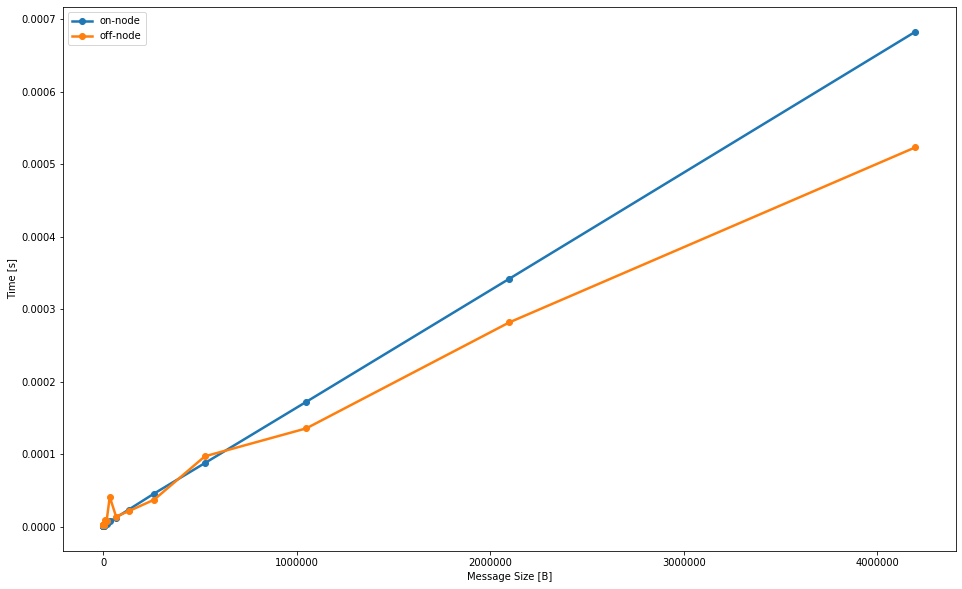

In [7]:
names = ['data/intra_ping_pong.txt', 'data/inter_ping_pong.txt']
labels = ['on-node', 'off-node']

p = np.zeros((2,2))
bandwidth = np.zeros(2)
latency = np.zeros(2)

fig = plt.figure(figsize=(16, 10))
for j in range(2):   
    file_name = names[j]
    ff = np.loadtxt(file_name)    
    f = ff[0:20,:] # Use the first 20 points for fitting latency
    p[j, :]= np.polyfit(f[:, 0], f[:, 1], 1)   

    plt.plot(f[:, 0], f[:,1], label=labels[j], marker='o', linewidth=2.5)

bandwidth = 1. / p[:, 0] / 1e9  # GB/s
latency = p[:, 1] / 1e-6  # us

print(f"On-Node: \nLatency: {latency[0]} us\nBandwidth: {bandwidth[0]} GB/s")
print()
print(f"Off-Node: \nLatency: {latency[1]} us\nBandwidth: {bandwidth[1]} GB/s")

plt.xlabel('Message Size [B]')
plt.ylabel('Time [s]')
plt.legend()

# plt.savefig('Figures/ping-pong.png', format='png', dpi=200)

In [5]:
p

array([[1.62430001e-10, 1.30448469e-06],
       [1.25070588e-10, 6.87474334e-06]])

In [6]:
bandwidth, latency

(array([6.15649815, 7.99548493]), array([1.30448469, 6.87474334]))

In [14]:
import numpy as np

x = [8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536,131072]
y_intra = [0.000000594,0.000000622,0.000000696,0.000000734,0.000000756,0.000000768,0.000000787,0.000000999,0.000001173,0.000001688,0.000003695,0.000004356,0.000006824,0.000011466,0.00002388]

y_inter = [0.000001435,0.00000149,0.000001438,0.00000144,0.00000129,0.000001493,0.0000016,0.000001645,0.000002215,0.000003114,0.000005,0.000005538,0.000007453,0.000011568,0.000019171]

p1_intra,p2_intra = np.polyfit(x,y_intra,1)

p1_inter,p2_inter = np.polyfit(x,y_inter,1)

# A = np.vstack([x, np.ones(len(x))]).T
# p1, p2 = nnls(A, y_inter, maxiter=1e6)[0]

print(f"Intra node: \nLatency: {p2_intra/1e-6} us\nBandwidth: {1/p1_intra/1e9} GB/s")
print()
print(f"Inter node: \nLatency: {p2_inter/1e-6} us\nBandwidth: {1/p1_inter/1e9} GB/s")

Intra node: 
Latency: 0.8975332244922877 us
Bandwidth: 5.751749656820693 GB/s

Inter node: 
Latency: 1.9934692854636171 us
Bandwidth: 7.2839915007619425 GB/s
